# Case study I

## Case study 1: Learn how to translate DNA

This will involve **4 tasks**

1. Download only the **sequence** (not header) of DNA (NM_207618.2) as dna.txt and its corresponding protein seq (CDS) as protein.txt from NCBI in FASTA format to computer.

2. Import DNA into python

3. Check that the length of the seq is divisible by 3

4. Import translation table as dictionary

4. Look up each 3-letter string in table and store result

5. Continute look up till you reach end of sequence


## Import DNA into python

This essentially means that you have to read the file. There are two ways to read a file in python

-  Line by line (more memory efficient, but not always useful)

In [ ]:
 filename = "read.txt"
  for line in open(filename):
    print(line)
    line = line.rstrip() # this removes the \n at the end of each line and returns a string. And since strings are immutable, have to reassign
    print(line)
    line = line.rstrip().split(" ") # will split the \n stripped string by " " and return a list 
    print(line)

-  Complete file at once

First confirm if the `pwd` is correct, if not `cd` into that directory from the python console. **_OR_** You can also give complete or relative path to the file instead.

In [9]:
#pwd # make sure the working directory is correct 
inputfile = "./files/dna.txt"
f = open(inputfile,"r") # open the file for reading as f
seq = f.read() # read entire file into variable seq
seq

'GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA\nGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT\nCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT\nTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT\nCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG\nAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA\nACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA\nGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT\nTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA\nGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA\nCCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT\nTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT\nGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGG\nTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGA

A better way to read the entire file at once is using `with`, which opens a file and uses it for the subsequent block of code only and then closes the file

In [ ]:
inputfile = "./files/dna.txt"
with open(inputfile,"r") as f:
    seq = f.read() # read entire file into variable seq
seq

Notice the `\n` in the printed sequence above ? We need to get rid of it otherwise it will cause problems during translation

In [10]:
print(seq)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCA
GATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCT
CCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCT
TAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCT
CAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTG
AGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAA
ACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAA
GGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGAT
TTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCA
GTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGA
CCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTT
TATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATT
GCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGG
TCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTT
GCTAAT

In [12]:
seq = seq.replace("\n","")
print(seq)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACTT

Sometimes return carriage character `\r` is another invisible character that could be present in your copied text. Depending on your editor, you may or may not see it. It is just safer to add a line of code to replace it, just in case

In [13]:
seq = seq.replace("\r","")
print(seq)

GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACTT

In [5]:
def read_seq(inputfilename):
    """Reads and returns the input sequence with special characters removed"""
    with open(inputfilename,"r") as f:
        seq = f.read() # read entire file into variable seq
    seq = seq.replace("\n","")
    seq = seq.replace("\r","")
    return seq

`./files/table.py` contains a pre-made dictionary named table. Copy it here (make sure it is not indented)

In [16]:
table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}
#print(table)
# how to traverse a dictionary
table['GAA']

'E'

In [17]:
# or
table["GAA"]

'E'

## Check that the length of the seq is divisible by 3

This can be done using `%` which checks if the remainder is zero.


In [20]:
len(seq) % 3 

2

In [2]:
def translate(seq):
    """Translate a string containing a nucleotide sequence into a string containing the corresponding sequence of amino acids . Nucleotides are translated in triplets using the table dictionary; each amino acid 4 is encoded with a string of length 1"""
    table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    
    protein = ""
    if len(seq)%3 == 0:
        for i in range(0, len(seq), 3):
            codon = seq[i: i+3]
            protein += table[codon]
    return(protein)
        
    

In [66]:
# lets test it out
translate("ATA")

'I'

In [56]:
help(translate) # the docstring gives the help menu

Help on function translate in module __main__:

translate(seq)
    Translate a string containing a nt seq into its corresponding protein seq by translating codons using translation table



In [6]:
profilename = "./files/protein.txt"
pro = read_seq(profilename)
pro

'MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC'

In [7]:
dnafilename = "./files/dna.txt"
dna = read_seq(dnafilename)
dna

'GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACT

In [ ]:
translate(dna)

Since our sequence length is not divisible by 3, we don't get anything returned by our function ! Checking with the original NCBI entry, we see that the CDS is actually between 21 - 938 ( 20 - 938 in python indexing)

In [41]:
translate(dna[20:938])

'MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC_'

In [9]:
pro == translate(dna[20:938])

False

Since the stop codon is included in our downloaded (and CDS positions), we see the extra `_` in our translation. So if we remove the last codon, our translation will be identical to that of the NCBI download protein seq

In [42]:
translate(dna[20:935])

'MSTHDTSLKTTEEVAFQIILLCQFGVGTFANVFLFVYNFSPISTGSKQRPRQVILRHMAVANALTLFLTIFPNNMMTFAPIIPQTDLKCKLEFFTRLVARSTNLCSTCVLSIHQFVTLVPVNSGKGILRASVTNMASYSCYSCWFFSVLNNIYIPIKVTGPQLTDNNNNSKSKLFCSTSDFSVGIVFLRFAHDATFMSIMVWTSVSMVLLLHRHCQRMQYIFTLNQDPRGQAETTATHTILMLVVTFVGFYLLSLICIIFYTYFIYSHHSLRHCNDILVSGFPTISPLLLTFRDPKGPCSVFFNC'

In [10]:
pro == translate(dna[20:935])

True

Instead of removing the last codon of the DNA sequence, we could also simply omit the last amino acid of the translated sequence 

In [11]:
pro == translate(dna[20:938])[:-1]

True

In [12]:
translate(dna[20:938])[:-1] == translate(dna[20:935])

True

## Homework 

**Exercise 1**

A cipher is a secret code for a language. In this case study, we will explore a cipher that is reported by contemporary Greek historians to have been used by Julius Caesar to send secret messages to generals during times of war.

The Caesar cipher shifts each letter of a message to another letter in the alphabet located a fixed distance from the original letter. If our encryption key were 1, we would shift `h` to the next letter `i`, `i` to the next letter `j`, and so on. If we reach the end of the alphabet, which for us is the space character, we simply loop back to `a`. To decode the message, we make a similar shift, except we move the same number of steps backwards in the alphabet.

Over the next five exercises, we will create our own Caesar cipher, as well as a message decoder for this cipher. In this exercise, we will define the alphabet used in the cipher.

-  The `string` library has been imported. Create a string called `alphabet` consisting of the lowercase letters of the space character space `' '`, concatenated with string.ascii_lowercase at the end.

In [ ]:
import string
alphabet = (' ') + string.ascii_lowercase

**Exercise 2**

In this exercise, we will define a dictionary that specifies the index of each character in alphabet.

-  `alphabet` has already defined from the last exercise. Create a dictionary with keys consisting of the characters in `alphabet`, and values consisting of the numbers from 0 to 26.
-  Store this as `positions`.


In [ ]:
positions = {}
cnt = 0
for k in list(alphabet):
    positions[k] = cnt
    cnt +=1

**Exercise 3**

In this exercise, we will encode a message with a Caesar cipher.

-  `alphabet` and `positions` have already been defined from previous exercises. Use `positions` to create an encoded message based on message where each character in message has been shifted forward by 1 position, as defined by positions. Note that you can ensure the result remains within 0-26 using result % 27
-  Store this as `encoded_message`.


In [ ]:
message = "hi my name is caesar"
alphabet
encoded_message = ''
newvals = []
for x in list(message):
    #print(x + "="+str(positions[x]))
        #print(x)
    if positions[x] != 26:
        newpos = positions[x]+1
        newvals.append(newpos)
        #print(x + "is now ="+ str(newpos))
    else:
        newpos = 0
        newvals.append(newpos)
        #print(x + "is now ="+ str(newpos))      

#newvals
for val in newvals:
    for m in positions.keys():
        if positions[m] == val:
            #print(m)
            encoded_message += m

encoded_message

**Exercise 4 **

In this exercise, we will define a function that encodes a message with any given encryption key.

-  `alphabet`, `position` and `message` remain defined from previous exercises. In addition, sample code for the previous exercise is provided below. Modify this code to define a function `encoding` that takes a message as input as well as an `int` encryption key `key` to encode a message with the Caesar cipher by shifting each letter in `message` by `key` positions.
-  Your function should return a string consisting of these encoded letters.
-  Use `encode` to encode `message` using `key = 3`, and save the result as `encoded_message`.
-  Print `encoded_message`

In [ ]:
def encoding(message,key):
    encoding_list = []
    for char in message:
        position = positions[char]
        encoded_position = (position + key) % 27
        encoding_list.append(alphabet[encoded_position])
    encoded_string = "".join(encoding_list)
    return(encoded_string)

encoded_message = encoding(message,3)
print(encoded_message)

**Exercise 5 **

In this exercise, we will decode an encoded message.


-  Note that `encoding` and `encoded_message` are already loaded from the previous problem. Use `encoding` to decode encoded_message using `key = -3`.
-  Store your decoded message as `decoded_message`.
-  Print `decoded_message`. Does this recover your original message?


In [ ]:
decoded_message = encoding(encoded_message,-3)
print(decoded_message)

## Case study 2: Language Processing

In this case study we are going to use the Gutenburg project to count the unique words in different books.


In [16]:
text = "This is my text string. We're keeping this text short to keep it manageable"

def count_words(text):
    """Counts the number of times each word occurs in text (str). Return dictionary, where keys are unique words and the values are word counts"""
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts


From the result we see few problems that will cause word count inflations.

-  words with first letter capitalized <- easy to fix by changing everything to lower case
-  words with periods <- more complex to address

(test this option later-> [s.translate(None, string.punctuation) for s in test_case])
Lets re-write our function 

In [17]:
def count_words(text):
    """Counts the number of times each word occurs in text (str). Return dictionary, where keys are unique words and the values are word counts. Punctuations are skipped and first letter capitalizations are ignored"""
    text = text.lower()
    skips = [",",".",";",":","'",'"'] # note that " is enclosed within single quotes
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

count_words(text)

{'is': 1,
 'it': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'string': 1,
 'text': 2,
 'this': 2,
 'to': 1,
 'were': 1}

Python has a `collections` module that has a `counter` function that is very handy for our purpose

In [18]:
from collections import Counter

def count_words_fast(text):
    """Counts the number of times each word occurs in text (str). Return dictionary, where keys are unique words and the values are word counts. Punctuations are skipped and first letter capitalizations are ignored"""
    text = text.lower()
    skips = [",",".",";",":","'",'"'] # note that " is enclosed within single quotes
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

In [ ]:
count_words(text)

In [ ]:
count_words_fast(text)

In [9]:
count_words(text) == count_words_fast(text)

True

In [5]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [19]:
def read_book(title_path):
    """Read a book and return it as a string"""
    with open(title_path,"r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return(text)

In [7]:
text = read_book("./files/gutenburg/English/shakespeare/Romeo and Juliet.txt")
len(text)

169275

Lets see if we can find the famous line "What's in a name?" in our read string

In [19]:
ind = text.find("What's in a name?")
ind

42757

So the line is there and the returned index gives its starting position

In [21]:
sample_text = text[ind: ind+1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [20]:
def word_stats(word_counts):
    """Return number of unique words and word frequencies"""
    num_unique = len(word_counts) # since this is a dictionary of unique words, the length should give us the number of unique keys aka words
    counts = word_counts.values() # will return the freq or counts of each unique word in our texty
    return(num_unique, counts)

In [ ]:
text = read_book("./files/gutenburg/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words_fast(text)
(num_unique, counts) = word_stats(word_counts)

In [30]:
print(num_unique,sum(counts))

5118 40776


In [ ]:
sum(counts) # words in total

How does the Romeo and Juliet in English compare with its translation in german?

In [27]:
textg = read_book("./files/gutenburg/German/shakespeare/Romeo und Julia.txt")
word_countsg = count_words_fast(textg)
(num_uniqueg, countsg) = word_stats(word_countsg)

In [31]:
print(num_uniqueg,sum(countsg))

7527 20311


### Opening multiple files

In [21]:
import os
book_dir = "./files/gutenburg"

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)

NotADirectoryError: [Errno 20] Not a directory: './files/gutenburg/.DS_Store'

In the above code, I keep getting error for the hidden file `.DS_Store` . In the class discussion forum this issue was faced by someone else too. A suggested answer (by: DrBobby) was a custom code to filter out hidden files.

In [22]:
def listdir_filtered(dir_path):
    """
    Filtering out hidden objects in a directory (i.e., such whose respective names start with "."), 
    out of the original list returned by the os.listdir(dir_path)
    """
    dirs = os.listdir(dir_path)
    dir_hidden_filter = [dir.startswith('.') for dir in dirs]
    return [dir for (dir, hidden) in zip(dirs, dir_hidden_filter) if not hidden]

Lets try rewriting the above code using this function

In [66]:
import os
book_dir = "./files/gutenburg"

for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)

./files/gutenburg/English/shakespeare/A Midsummer Night's Dream.txt
./files/gutenburg/English/shakespeare/Hamlet.txt
./files/gutenburg/English/shakespeare/Macbeth.txt
./files/gutenburg/English/shakespeare/Othello.txt
./files/gutenburg/English/shakespeare/Richard III.txt
./files/gutenburg/English/shakespeare/Romeo and Juliet.txt
./files/gutenburg/English/shakespeare/The Merchant of Venice.txt
./files/gutenburg/French/chevalier/L'åle de sable.txt
./files/gutenburg/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./files/gutenburg/French/chevalier/La capitaine.txt
./files/gutenburg/French/chevalier/La fille des indiens rouges.txt
./files/gutenburg/French/chevalier/La fille du pirate.txt
./files/gutenburg/French/chevalier/Le chasseur noir.txt
./files/gutenburg/French/chevalier/Les derniers Iroquois.txt
./files/gutenburg/French/de Maupassant/Boule de Suif.txt
./files/gutenburg/French/de Maupassant/Claire de Lune.txt
./files/gutenburg/French/de Maupassant/Contes de la Becasse.txt

The code does work ! Another way that I found is using `os.walk`

In [102]:
for path, directories, files in os.walk("./files/gutenburg/"):  
    #print(path)
    print(directories)
    #print(files) # shows hidden files

['English', 'French', 'German', 'Portuguese']
['shakespeare']
[]
['chevalier', 'de Maupassant', 'diderot', 'sand']
[]
[]
[]
[]
['lessing', 'raimund', 'schiller', 'shakespeare']
[]
[]
[]
[]
['branco', 'dinis', 'Queir¢s', 'shakespeare']
[]
[]
[]
[]


In [36]:
for path, directories, files in os.walk("./files/gutenburg/"):  
    for inputfile in files:
        if not inputfile.startswith('.'):
            print(inputfile) # hidden files gone !

A Midsummer Night's Dream.txt
Hamlet.txt
Macbeth.txt
Othello.txt
Richard III.txt
Romeo and Juliet.txt
The Merchant of Venice.txt
L'åle de sable.txt
L'enfer et le paradis de l'autre monde.txt
La capitaine.txt
La fille des indiens rouges.txt
La fille du pirate.txt
Le chasseur noir.txt
Les derniers Iroquois.txt
Boule de Suif.txt
Claire de Lune.txt
Contes de la Becasse.txt
L'inutile beautÇ.txt
La Main Gauche.txt
La Maison Tellier.txt
La petite roque.txt
Le Horla.txt
Œuvres complètes de Guy de Maupassant.txt
Ceci n'est pas un conte.txt
Entretien d'un päre avec ses enfants.txt
L'oiseau blanc.txt
Les deux amis de Bourbonne.txt
Regrets sur ma vieille robe de chambre.txt
cora.txt
Jacques le fataliste et son maåtre.txt
L' Orco.txt
La Coupe; Lupo Liverani; Le Toast; Garnier; Le Contrebandier; La Ràverie Ö Paris.txt
La Marquise.txt
Le Piccinino.txt
Le poâme de Myrza.txt
Mattea.txt
Metella.txt
Oeuvres illustrÇes de George Sand.txt
Pauline.txt
der freigeist.txt
der junge gelehrte.txt
die ju

In [56]:
for path, directories, files in os.walk("./files/gutenburg/"):  
    for inputfile in files:
        if not inputfile.startswith('.'):
            #print(inputfile)
            inputpath = path+ "/"+inputfile
            print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))           

./files/gutenburg/English/shakespeare/A Midsummer Night's Dream.txt
./files/gutenburg/English/shakespeare/Hamlet.txt
./files/gutenburg/English/shakespeare/Macbeth.txt
./files/gutenburg/English/shakespeare/Othello.txt
./files/gutenburg/English/shakespeare/Richard III.txt
./files/gutenburg/English/shakespeare/Romeo and Juliet.txt
./files/gutenburg/English/shakespeare/The Merchant of Venice.txt
./files/gutenburg/French/chevalier/L'åle de sable.txt
./files/gutenburg/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./files/gutenburg/French/chevalier/La capitaine.txt
./files/gutenburg/French/chevalier/La fille des indiens rouges.txt
./files/gutenburg/French/chevalier/La fille du pirate.txt
./files/gutenburg/French/chevalier/Le chasseur noir.txt
./files/gutenburg/French/chevalier/Les derniers Iroquois.txt
./files/gutenburg/French/de Maupassant/Boule de Suif.txt
./files/gutenburg/French/de Maupassant/Claire de Lune.txt
./files/gutenburg/French/de Maupassant/Contes de la Becasse.txt

#### Pandas (panel data)

Though the code above works fine, we can be more efficient by using Pandas to track out book statistics

Lets quickly create a table using pandas dataframe function to see how it works

In [61]:
import pandas as pd
table = pd.DataFrame(columns= ("name","age")) # lets first specify the columns
table.loc[1] = "James", 22 # row 1
table.loc[2] = "Jess", 24 # row 2
table

,name,age
1,James,22
2,Jess,24


In [103]:
import os
book_dir = "./files/gutenburg"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1
for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputpath = book_dir + "/" + language + "/" + author + "/" + title
            print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))
            stats.loc[title_num] = language, author, title,sum(counts),num_unique
            title_num += 1

./files/gutenburg/English/shakespeare/A Midsummer Night's Dream.txt
./files/gutenburg/English/shakespeare/Hamlet.txt
./files/gutenburg/English/shakespeare/Macbeth.txt
./files/gutenburg/English/shakespeare/Othello.txt
./files/gutenburg/English/shakespeare/Richard III.txt
./files/gutenburg/English/shakespeare/Romeo and Juliet.txt
./files/gutenburg/English/shakespeare/The Merchant of Venice.txt
./files/gutenburg/French/chevalier/L'åle de sable.txt
./files/gutenburg/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./files/gutenburg/French/chevalier/La capitaine.txt
./files/gutenburg/French/chevalier/La fille des indiens rouges.txt
./files/gutenburg/French/chevalier/La fille du pirate.txt
./files/gutenburg/French/chevalier/Le chasseur noir.txt
./files/gutenburg/French/chevalier/Les derniers Iroquois.txt
./files/gutenburg/French/de Maupassant/Boule de Suif.txt
./files/gutenburg/French/de Maupassant/Claire de Lune.txt
./files/gutenburg/French/de Maupassant/Contes de la Becasse.txt

In [104]:
stats

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449
6,English,shakespeare,Romeo and Juliet.txt,40776,5118
7,English,shakespeare,The Merchant of Venice.txt,20949,4978
8,French,chevalier,L'åle de sable.txt,73801,18989
9,French,chevalier,L'enfer et le paradis de l'autre monde.txt,40827,10831
10,French,chevalier,La capitaine.txt,46306,13083


In [105]:
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449


In [72]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro.txt,128630,29300
99,Portuguese,Queir¢s,O Mandarim.txt,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio.txt,107303,27644
101,Portuguese,Queir¢s,Os Maias.txt,195771,40665
102,Portuguese,shakespeare,Hamlet.txt,30567,9700


In [106]:
stats.shape

(102, 5)

Testing out using our shorter code using `os.walk`, I realized that it is not useful for the pandas dataframe creation since I can't seperate the directories at invidual levels without needing to break the code (using either `break` or `next`)

Now lets make some modifications in the table.
-  Capitalize the authors names
-  Remove the `.txt` from the file names

In [108]:
import os
book_dir = "./files/gutenburg"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1
for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputpath = book_dir + "/" + language + "/" + author + "/" + title
            #print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""),sum(counts),num_unique
            title_num += 1            
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


Now say you already have a table and now you want to capitalize and replace text in colums.


In [109]:
import os
book_dir = "./files/gutenburg"

import pandas as pd
stats = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1
for language in listdir_filtered(book_dir):
    for author in listdir_filtered(book_dir + "/" + language):
        for title in listdir_filtered(book_dir + "/" + language + "/" + author):
            inputpath = book_dir + "/" + language + "/" + author + "/" + title
            #print(inputpath)
            text = read_book(inputpath)
            (num_unique, counts)=word_stats(count_words(text))
            stats.loc[title_num] = language, author, title,sum(counts),num_unique
            title_num += 1       
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449


In [110]:
stats['author'] = stats['author'].str.capitalize()
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,Shakespeare,Hamlet.txt,28551,6776
3,English,Shakespeare,Macbeth.txt,16874,4780
4,English,Shakespeare,Othello.txt,26590,5898
5,English,Shakespeare,Richard III.txt,48315,5449


In [111]:
stats['title'] = stats['title'].str.replace(".txt","")
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


In [155]:
stats.length.head() # access the entire column using stats.length

1    16103
2    28551
3    16874
4    26590
5    48315
Name: length, dtype: object

In [156]:
stats["length"].head()

1    16103
2    28551
3    16874
4    26590
5    48315
Name: length, dtype: object

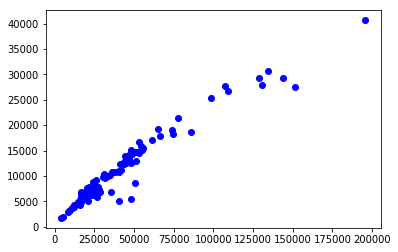

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique,"bo");

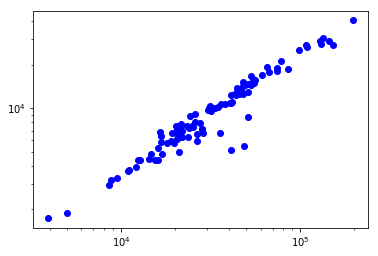

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(stats.length, stats.unique,"bo");

We can also stratify our data by language in pandas

In [115]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


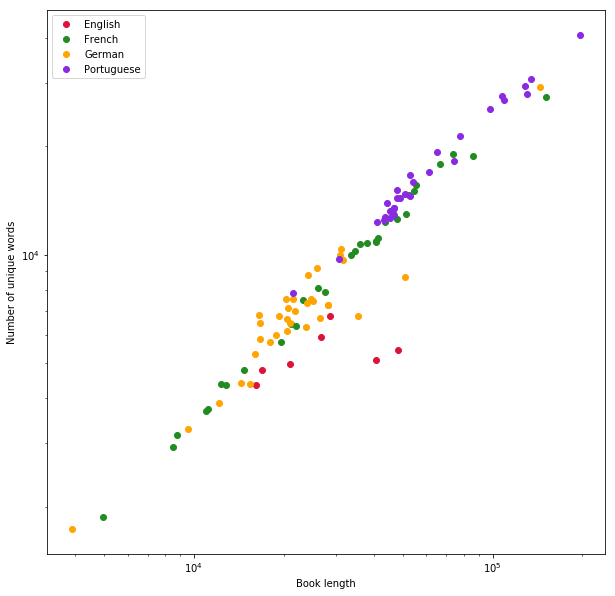

In [127]:
plt.figure(figsize=(10,10))

subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")

plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words");
#plt.savefig("lang_plot.pdf")

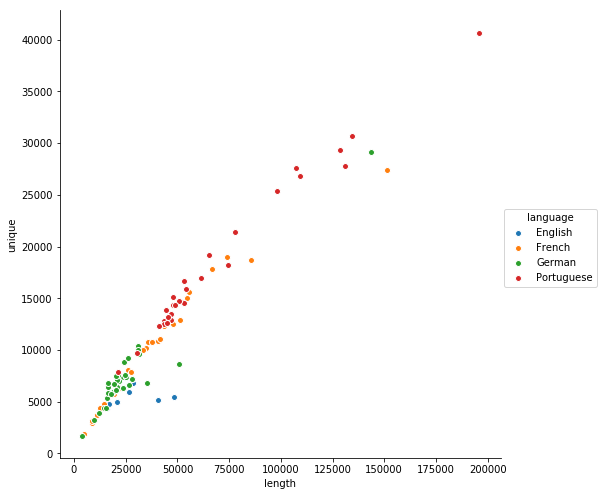

In [154]:
import seaborn as sns
g = sns.pairplot(x_vars=['length'], y_vars=['unique'], data=stats, hue='language', size=7)

#g = g.map_offdiag(plt.scatter,  s=35,alpha=0.5);